<a href="https://colab.research.google.com/github/thdgmltjd123/Assignment01/blob/master/20150711_Assignment06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
#구글 드라이브와 코랩 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **데이터 불러오기**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/data-nonlinear.txt", delimiter=',')
pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

# **로지스틱 회귀분석 구현**

In [0]:
#Z 생성 함수
def generate_z(theta,x,y):
  fxy = np.array([1,x,x**2,x**3,x**4,y,y**2,y**3,y**4,x*y,x*(y**2),x*(y**3),(x**2)*y,(x**2)*(y**2),(x**3)*y])
  return theta.dot(fxy.T)
#로지스틱 함수
def Logit(z):
  return 1 / (1 + np.exp(-z))
#energy 구할 때 log0일 때 오버플로가 나는 것을 방지
def apply_Logit(logit):
  li = []
  for i in logit:
    if i == 1 :
      li.append(i - 1e-9)
    elif i == 0 :
      li.append(i + 1e-9)
    else:
      li.append(i)
  return np.array(li)

#loss function 구현      
def energy(sigma):
  length = len(sigma)
  return sum(-label * np.log(sigma) - (1-label) * np.log(1-sigma)) / length

In [0]:
class LogisticClassifier:
  theta = np.arange(-35,40,5).astype('float64')
  def __init__(self, x, y):
    self.length = len(x)
    self.gxy = generate_z(self.theta, x, y)
    self.sigmoid = apply_Logit(Logit(self.gxy))
    self.temp_energy = energy(self.sigmoid)
  def predict(self):
    label_pred = []
    for i in self.sigmoid:
      if i < 0.5:
        label_pred.append(0)
      else:
        label_pred.append(1)
    return label_pred
  def accuracy(self,li):
    self.count = 0
    for i in range(len(li)):
      if(li[i] == label[i]):
        self.count+=1
    return self.count / len(li)
  def fit(self, x, y, alpha):
    fxy = np.array([1,x,x**2,x**3,x**4,y,y**2,y**3,y**4,x*y,x*(y**2),x*(y**3),(x**2)*y,(x**2)*(y**2),(x**3)*y])
    energy_val = [self.temp_energy]
    accuracy_val = [0]
    while True:
      self.gra_theta = []
      for i in fxy:
        self.gra_theta.append((self.sigmoid-label)*i)
      self.gra_theta = np.sum(np.array(self.gra_theta),axis = 1) / self.length
      self.theta -= alpha * self.gra_theta
      self.gxy = generate_z(self.theta,x,y)
      self.sigmoid = apply_Logit(Logit(self.gxy))
      accuracy_val.append(self.accuracy(self.predict()))
      self.next_energy = energy(self.sigmoid)
      energy_val.append(self.next_energy)
      if self.temp_energy - self.next_energy < 0.00000001:
        break
      self.temp_energy = self.next_energy
    return accuracy_val,energy_val

In [0]:
model = LogisticClassifier(pointX,pointY)
accuracy_val, energy_val = model.fit(pointX,pointY,0.1)

# **Plot the training data**

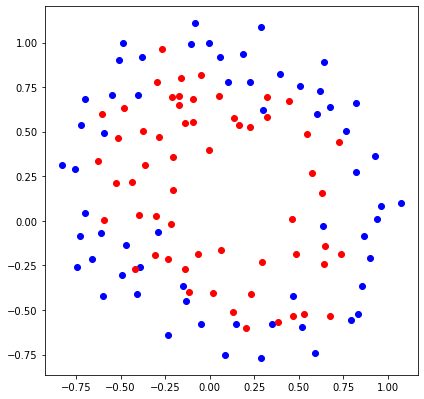

In [106]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure(figsize = (6,6))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# **Writh down the high dimensional function**

$g(x,y,\Theta) = \Theta_{0} + \Theta_{1}x + \Theta_{2}x^{2} + \Theta_{3}x^{3} + \Theta_{4}x^{4} + \Theta_{5}y + \Theta_{6}y^{2} + \Theta_{7}y^{3} + \Theta_{8}y^{4} + \Theta_{9}xy + \Theta_{10}xy^{2} + \Theta_{11}xy^{3} + \Theta_{12}x^{2}y + \Theta_{13}x^{2}y^{2} + \Theta_{14}x^{3}y$

# **Plot the training error**

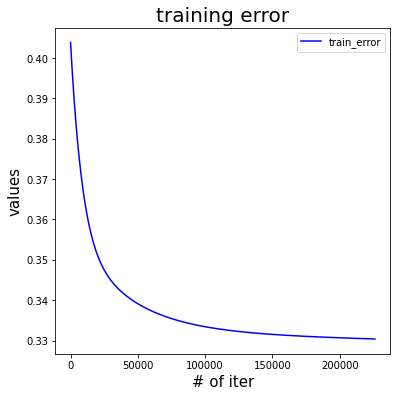

In [107]:
plt.figure(figsize = (6,6))
plt.title("training error",fontsize = 20)
plt.xlabel("# of iter",fontsize = 15)
plt.ylabel("values", fontsize = 15)
plt.plot(energy_val,c = "b",label = "train_error")
plt.legend(loc = "best")
plt.show()